In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving salary.csv to salary.csv


In [ ]:
dataset=pd.read_csv('salary.csv')
print(dataset)

       age  education.num  capital.gain  hours.per.week income
0       90              9             0              40  <=50K
1       82              9             0              18  <=50K
2       66             10             0              40  <=50K
3       54              4             0              40  <=50K
4       41             10             0              40  <=50K
...    ...            ...           ...             ...    ...
32556   22             10             0              40  <=50K
32557   27             12             0              38  <=50K
32558   40              9             0              40   >50K
32559   58              9             0              40  <=50K
32560   22              9             0              20  <=50K

[32561 rows x 5 columns]


In [ ]:
print(dataset.shape)
print(dataset.head(5))

(32561, 5)
   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K


In [ ]:
#mapping
income_set=set(dataset['income'])
dataset['income']=dataset['income'].map({'<=50K':0, '>50K':1}).astype(int)
print(dataset.head(20))

    age  education.num  capital.gain  hours.per.week  income
0    90              9             0              40       0
1    82              9             0              18       0
2    66             10             0              40       0
3    54              4             0              40       0
4    41             10             0              40       0
5    34              9             0              45       0
6    38              6             0              40       0
7    74             16             0              20       1
8    68              9             0              40       0
9    41             10             0              60       1
10   45             16             0              35       1
11   38             15             0              45       1
12   52             13             0              20       1
13   32             14             0              55       1
14   51             16             0              40       1
15   46             15  

In [ ]:
#Extraa
dataset.to_csv(r'dataset1.csv', index=False)

Segragate into values


In [ ]:
#segregate
x=dataset.iloc[:,:-1].values
x

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]])

In [ ]:
y=dataset.iloc[:,-1].values
y

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#splitting data into train and test model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.25, random_state=0)

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
x_train

array([[ 1.20264866, -2.76154633, -0.14509813, -0.03923011],
       [ 0.25021666, -0.42608063, -0.14509813, -0.03923011],
       [ 0.25021666, -0.42608063, -0.14509813, -0.03923011],
       ...,
       [-0.92200734, -0.81532491, -0.14509813,  0.85306386],
       [ 0.39674466,  1.52014079, -0.14509813, -0.03923011],
       [ 0.03042466, -0.42608063,  0.83219401, -0.03923011]])

Text(0, 0.5, 'Mean Error')

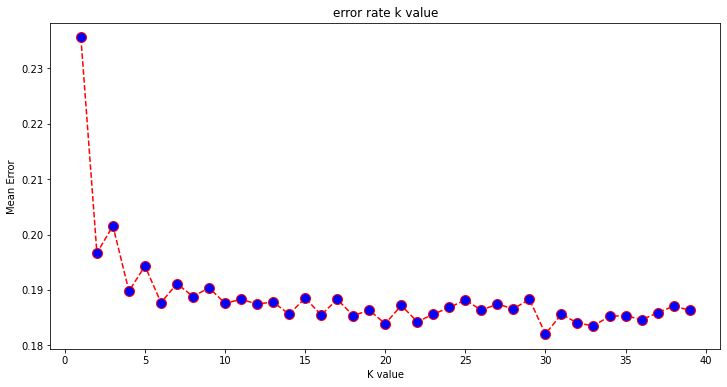

In [ ]:
#finding best k value
error=[]
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
#calculating error for k values betn 1-40
for i in range(1,40):
	model=KNeighborsClassifier(n_neighbors=i)
	model.fit(x_train,y_train)
	pred_i=model.predict(x_test)
	error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color="red", linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title("error rate k value")
plt.xlabel('K value')
plt.ylabel('Mean Error')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
model.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
#predict by input values
age=int(input("enter age"))
edu=int(input("enter education"))
cg=int(input("enter capital gain "))
wh=int(input("enter hours per week "))
newEmp=[[age,edu,cg,wh]]
result=model.predict(sc.transform(newEmp))
print(result)

if result ==1:
	print("salary above 50K")
else:
	print("salary below 50K")

enter age18
enter education15
enter capital gain 0
enter hours per week 40
[0]
salary below 50K


In [ ]:
#predicting wheather buy or not
y_pred=model.predict(x_test)

In [ ]:
#accuracy
from sklearn.metrics import accuracy_score
print("accuracy of the model: {0}%".format(accuracy_score(y_test,y_pred)*100))

accuracy of the model: 80.56749785038693%
